<font size = 7 color = green><b>Song Cohort Clustering and Exploratory Analysis

---

Key for understanding each markdown

- <font color = red> ```red``` are for inferences or understanding from the codes
- <font color = green> ```green``` are subheadings from the key actions we need to perform in this assignment.
- <font color = blue> ```blue``` are conceptual comments and plan to move forward

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/shivanimishra/Documents/IIT - K /Machine Learning/Project/rolling_stones_spotify.csv")
df.head(5)

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

<font size = 4 color = green >

### First we need to explore the data in Python to see what type of dataset we're dealing with. To perform a few basic info metrics we will use exploratory commands from the pandas library to understand the data. 

In [3]:
df.shape

(1610, 18)

In [6]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                         name               album  \
0              0   Concert Intro Music - Live  Licked Live In NYC   
1              1   Street Fighting Man - Live  Licked Live In NYC   
2              2           Start Me Up - Live  Licked Live In NYC   
3              3  If You Can't Rock Me - Live  Licked Live In NYC   
4              4            Don’t Stop - Live  Licked Live In NYC   
...          ...                          ...                 ...   
1605        1605                        Carol  The Rolling Stones   
1606        1606                      Tell Me  The Rolling Stones   
1607        1607          Can I Get A Witness  The Rolling Stones   
1608        1608   You Can Make It If You Try  The Rolling Stones   
1609        1609              Walking The Dog  The Rolling Stones   

     release_date  track_number                      id  \
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   
1      2022-06-10  

In [10]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [14]:
df.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

<font size = 4 color = blue>
    
---

The above shows datatypes of each of our columns present in our dataset, and this will help us decide which operations to perform going forward for each of the columns if any is necessary. 

---

In [16]:
# checking for duplicates in our dataset to ensure there are none. 
duplicates = df.duplicated(subset = 'id')
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1605    False
1606    False
1607    False
1608    False
1609    False
Length: 1610, dtype: bool

In [17]:
print(f"Number of duplicate rows based on 'id': {duplicates.shape[0]}")
if not duplicates.empty:
    print(duplicates.head())  # Show first few duplicate rows

Number of duplicate rows based on 'id': 1610
0    False
1    False
2    False
3    False
4    False
dtype: bool


In [18]:
# Drop duplicates based on 'id'
df = df.drop_duplicates(subset='id')

# Check if duplicates were removed
print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of rows after removing duplicates: 1610


In [20]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [21]:
df.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

In [23]:
df['release_date']

0       2022-06-10
1       2022-06-10
2       2022-06-10
3       2022-06-10
4       2022-06-10
           ...    
1605    1964-04-16
1606    1964-04-16
1607    1964-04-16
1608    1964-04-16
1609    1964-04-16
Name: release_date, Length: 1610, dtype: object

---
<font size = 4 color = blue>

Since our column ```Release_date``` is in date format we need to convert this into a more readable format for python by converting into datetime format. 

---

In [25]:
df['release_date']= pd.to_datetime(df['release_date'], errors='coerce')
df.head(5)

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [26]:
# Extract year, month, day from 'release_date'
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

In [27]:
df.head(3)

Unnamed: 0                        name               album release_date  \
0           0  Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1  Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2          Start Me Up - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   

   acousticness  danceability  energy  ...  liveness  loudness  speechiness  \
0        0.0824         0.463   0.993  ...     0.932   -12.913       0.1100   
1        0.4370         0.326   0.965  ...     0.961    -4.803       0.0759   
2        0.4160         0.386   0.969  ...     0.956    -4.936       0.1150   

     tempo  valence  popularity  duration_ms  release_year  release_month  \
0  118.001   0.0302          33        48640          2022              6   
1  131.455   0.3180          34       253173          2022              6   
2  130.066   0.3130          34       263160          2022              6   

   release_day  
0           10  
1           10  
2           10  

[3 rows x 21 columns]

<font color = blue>
    
---
Out of all these columns above we might not need a few going forward when we do clustering of the data, these columns can be:
- name
- album
- release_date
- id
- uri
- tracknumber

Considering this we can go ahead and drop these columns, however we won't be dropping these columns from our original dataset 'df' but we'll be creating a copy of our dataset as 'df1' where we will remove these columns. 

---

In [29]:
df1 = df.drop(['name', 'album', 'release_date', 'id', 'uri', 'track_number'], axis=1)
df1.head(3)

Unnamed: 0  acousticness  danceability  energy  instrumentalness  liveness  \
0           0        0.0824         0.463   0.993             0.996     0.932   
1           1        0.4370         0.326   0.965             0.233     0.961   
2           2        0.4160         0.386   0.969             0.400     0.956   

   loudness  speechiness    tempo  valence  popularity  duration_ms  \
0   -12.913       0.1100  118.001   0.0302          33        48640   
1    -4.803       0.0759  131.455   0.3180          34       253173   
2    -4.936       0.1150  130.066   0.3130          34       263160   

   release_year  release_month  release_day  
0          2022              6           10  
1          2022              6           10  
2          2022              6           10

<font color = green>

# Check for irrelevant entries, such as negative duration or popularity outliers
### Example: Checking if any songs have a duration of zero or less

In [32]:
irrelevant_entries = df1[(df1['duration_ms'] <= 0) | (df1['popularity'] < 0)]

# Display irrelevant entries if found
print(f"Number of irrelevant entries: {irrelevant_entries.shape[0]}")
if not irrelevant_entries.empty:
    print(irrelevant_entries)
    
# Remove irrelevant entries if any are found
df1 = df1[(df1['duration_ms'] > 0) & (df1['popularity'] >= 0)]

Number of irrelevant entries: 0


<font color = green>

---
# Checking for Outliers
### Outliers can be identified in features like ```loudness```, ```tempo```, ```popularity```, and ```duration_ms```. A common method to detect outliers is using the Interquartile Range (IQR).

---

In [33]:
# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]

# Detect outliers in 'loudness', 'tempo', 'popularity', and 'duration_ms'
outliers_loudness = detect_outliers(df1, 'loudness')
outliers_tempo = detect_outliers(df1, 'tempo')
outliers_popularity = detect_outliers(df1, 'popularity')
outliers_duration = detect_outliers(df1, 'duration_ms')

# Display the number of outliers
print(f"Number of loudness outliers: {outliers_loudness.shape[0]}")
print(f"Number of tempo outliers: {outliers_tempo.shape[0]}")
print(f"Number of popularity outliers: {outliers_popularity.shape[0]}")
print(f"Number of duration outliers: {outliers_duration.shape[0]}")


Number of loudness outliers: 14
Number of tempo outliers: 34
Number of popularity outliers: 48
Number of duration outliers: 76


<font color = green>

---
# Rectifying Erroneous Entries

Once we’ve identified duplicates, missing values, irrelevant entries, or outliers, you can proceed to rectify them:

- Remove duplicates using ```drop_duplicates()```.
- Handle missing values either by dropping rows/columns or filling them with appropriate values (e.g., mean, median).
- Remove irrelevant entries based on logical criteria (e.g., negative durations).
- Remove outliers or cap them to reasonable values, depending on your analysis requirements.

In [34]:
# Example: Removing outliers from the dataset for 'loudness', 'tempo', etc.
df1 = df1[~df1.index.isin(outliers_loudness.index)]
df1 = df1[~df1.index.isin(outliers_tempo.index)]
df1 = df1[~df1.index.isin(outliers_popularity.index)]
df1 = df1[~df1.index.isin(outliers_duration.index)]

In [35]:
df1.head(5)

Unnamed: 0  acousticness  danceability  energy  instrumentalness  liveness  \
0           0        0.0824         0.463   0.993          0.996000     0.932   
1           1        0.4370         0.326   0.965          0.233000     0.961   
2           2        0.4160         0.386   0.969          0.400000     0.956   
3           3        0.5670         0.369   0.985          0.000107     0.895   
4           4        0.4000         0.303   0.969          0.055900     0.966   

   loudness  speechiness    tempo  valence  popularity  duration_ms  \
0   -12.913       0.1100  118.001   0.0302          33        48640   
1    -4.803       0.0759  131.455   0.3180          34       253173   
2    -4.936       0.1150  130.066   0.3130          34       263160   
3    -5.535       0.1930  132.994   0.1470          32       305880   
4    -5.098       0.0930  130.533   0.2060          32       305106   

   release_year  release_month  release_day  
0          2022              6           10  
1          2022              6           10  
2          2022              6           10  
3          2022              6           10  
4          2022              6           10

In [38]:
#running the outlier check code again to see if there are still any left. 

# Display the final shape of the cleaned dataset
print(f"Final dataset shape: {df1.shape}")

# Display summary statistics to ensure data consistency
print(df1.describe())


Final dataset shape: (1446, 15)
        Unnamed: 0  acousticness  danceability       energy  instrumentalness  \
count  1446.000000   1446.000000   1446.000000  1446.000000       1446.000000   
mean    802.924620      0.245105      0.474358     0.794266          0.166813   
std     468.193896      0.225506      0.139787     0.177602          0.278768   
min       0.000000      0.000009      0.104000     0.242000          0.000000   
25%     392.250000      0.054225      0.371250     0.673000          0.000210   
50%     799.500000      0.174000      0.464000     0.846000          0.013500   
75%    1211.750000      0.395750      0.582750     0.947000          0.185000   
max    1609.000000      0.939000      0.887000     0.999000          0.996000   

          liveness     loudness  speechiness        tempo      valence  \
count  1446.000000  1446.000000  1446.000000  1446.000000  1446.000000   
mean      0.486108    -6.901773     0.068826   124.501478     0.589408   
std       0.3468

<font color = blue>
    
## Understanding the distribution of features in my dataset

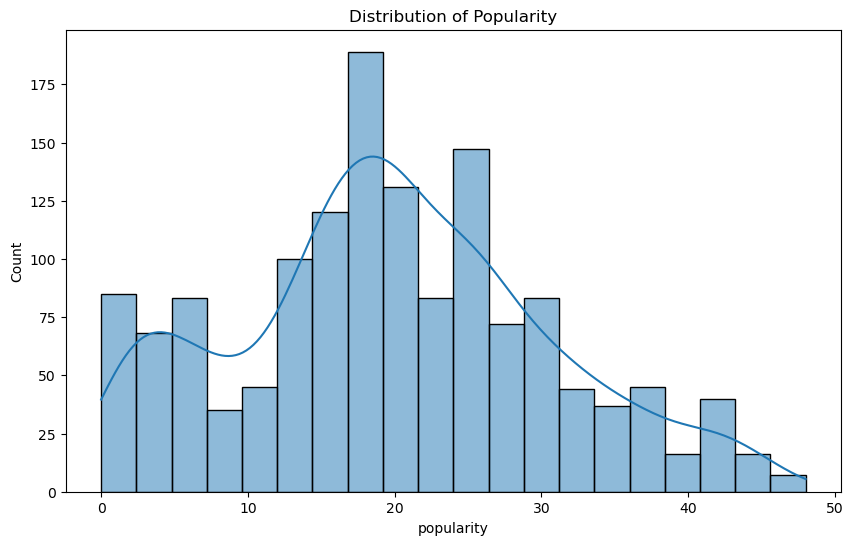

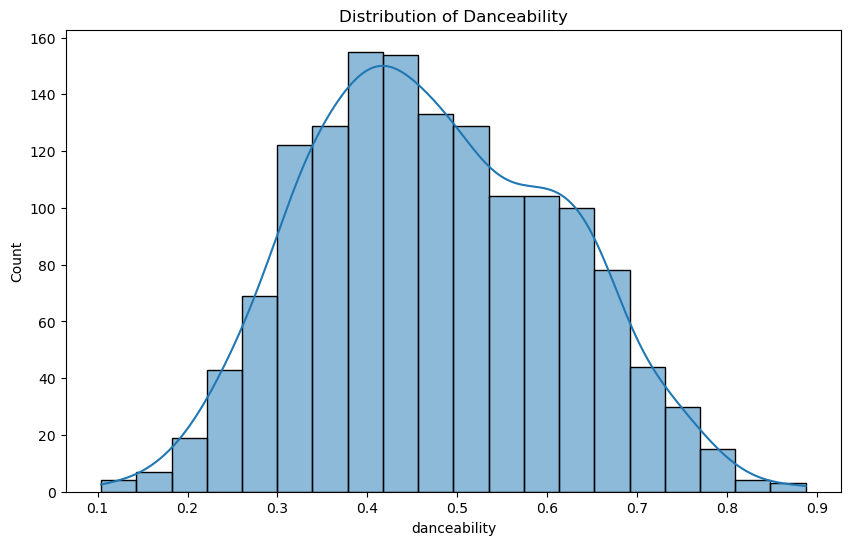

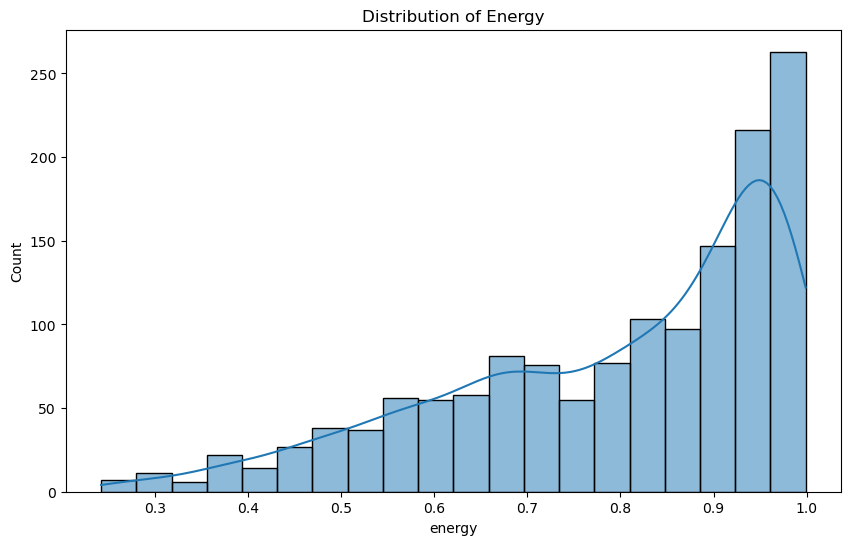

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'popularity'
plt.figure(figsize=(10,6))
sns.histplot(df1['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.show()

# Distribution of 'danceability'
plt.figure(figsize=(10,6))
sns.histplot(df1['danceability'], bins=20, kde=True)
plt.title('Distribution of Danceability')
plt.show()

# Distribution of 'energy'
plt.figure(figsize=(10,6))
sns.histplot(df1['energy'], bins=20, kde=True)
plt.title('Distribution of Energy')
plt.show()

<font color = blue>

# Correlation Matrix
The correlation matrix helps identify the relationship between various numerical features. Features with high correlation might indicate a strong relationship.

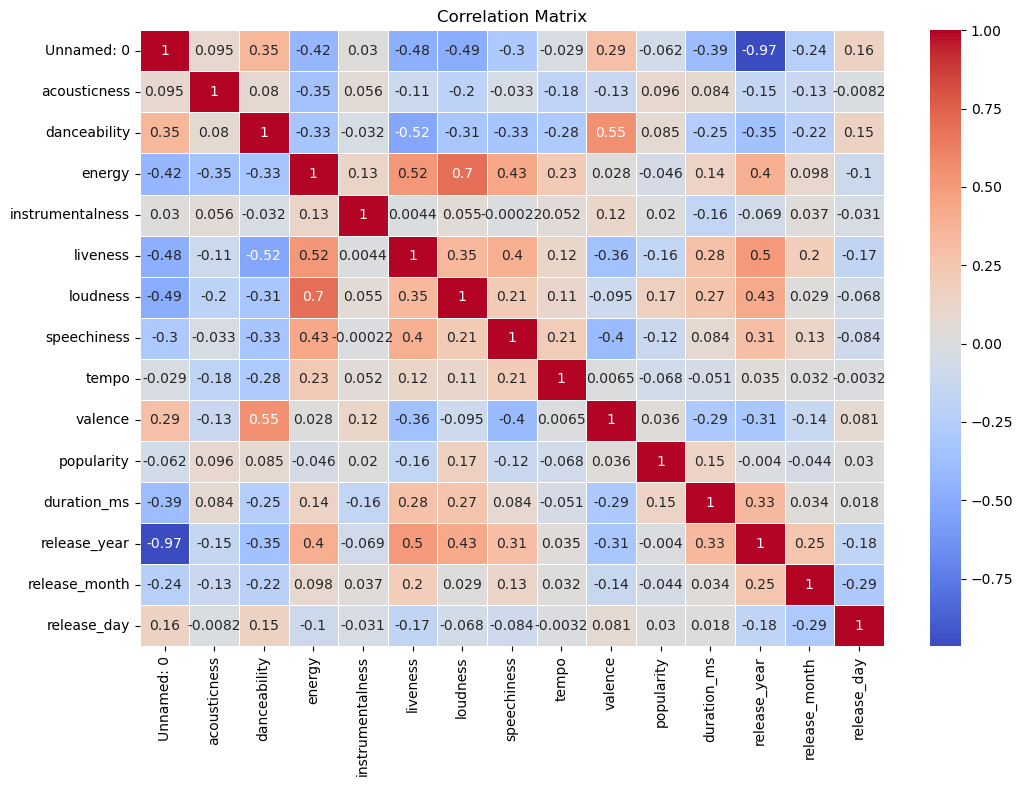

In [41]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<font color = blue>

# Pairplot of Key Features
Pairplot helps visualize the pairwise relationships between different features. This can help in observing trends between multiple variables.

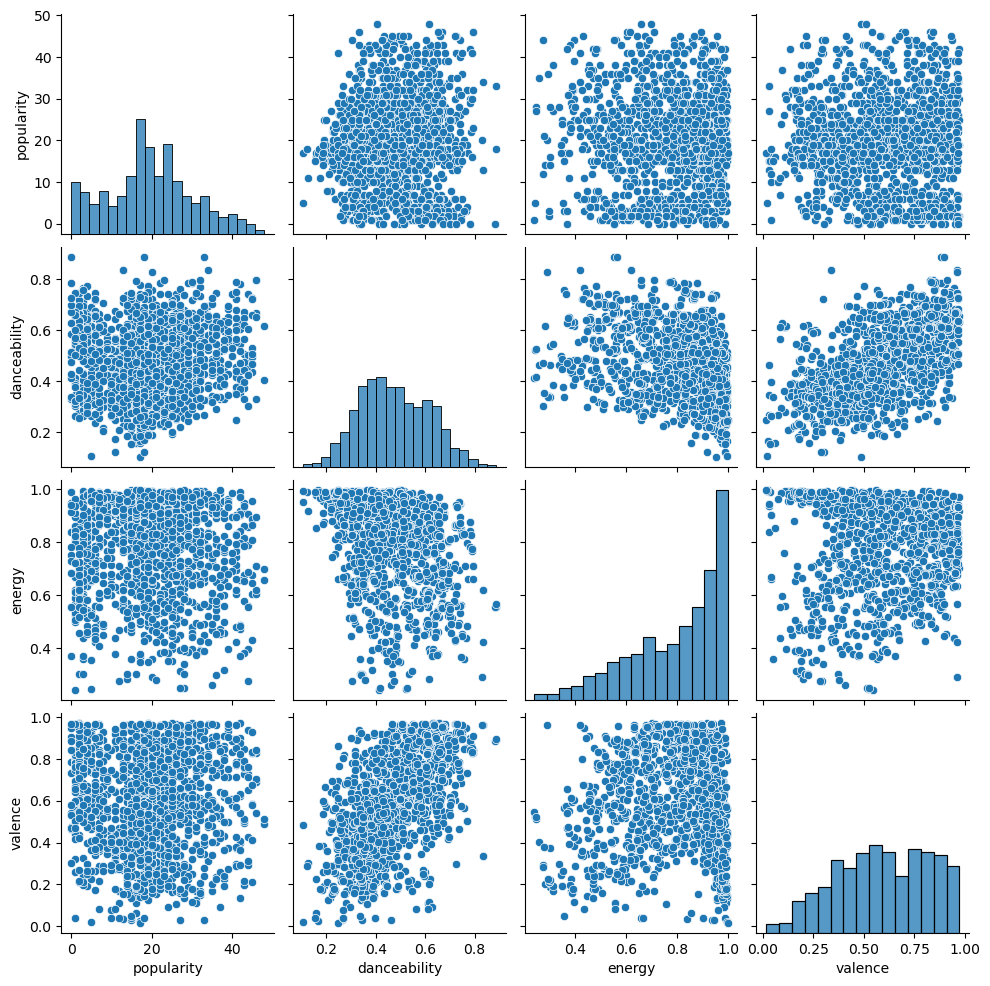

In [43]:
# Pairplot of selected features
sns.pairplot(df1[['popularity', 'danceability', 'energy', 'valence']])
plt.show()

<font color = red>

---

From the above plots we can see that our data is rich in pairs which can also give us an insight into the correlation plot generated above. Since we removed any categorical features from our dataset we can now understand that the colinearity between our present variables in the dataset are expressing both strong and weak colinearity. 

- for example: the danceability , energy and liveliless of the music express strong colinearity among them.
  This can also be understood in terms of the pairplot displayed above where we see the popularity of the song is strongly aligning with the graph danceability and valence [mood]  of the song

## Popularity vs. Other Features
Explore the relationship between popularity and other features to see which features might influence a song's popularity.

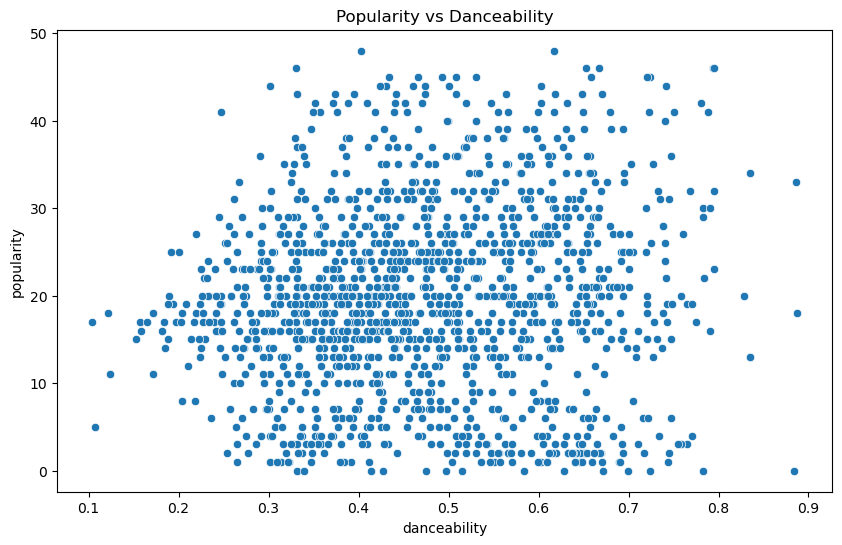

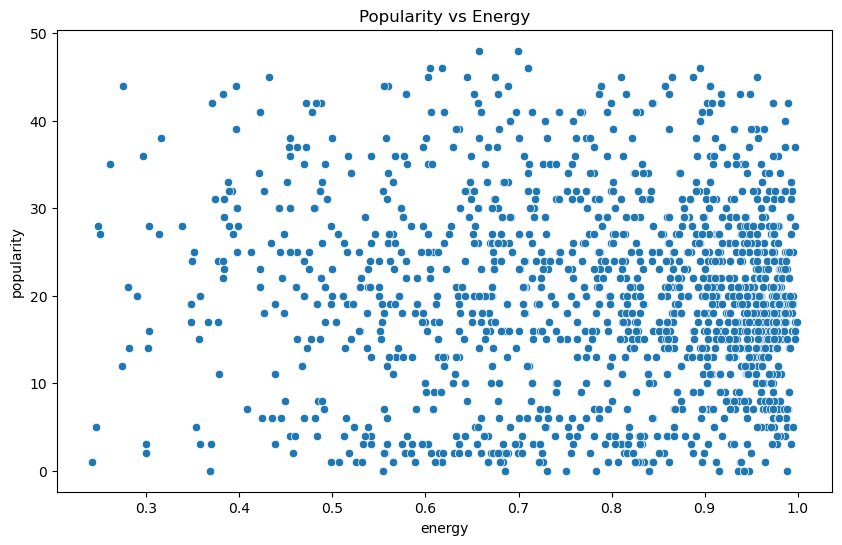

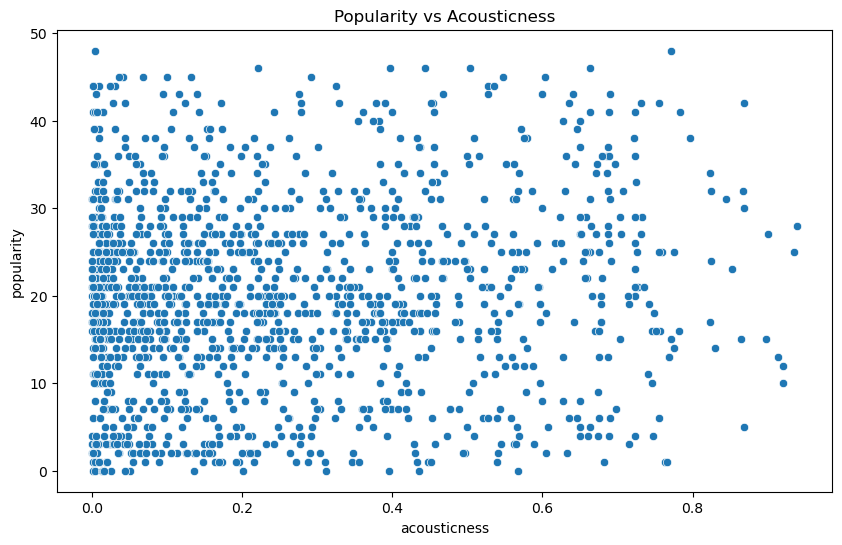

In [45]:
# Popularity vs Danceability
plt.figure(figsize=(10,6))
sns.scatterplot(x='danceability', y='popularity', data=df1)
plt.title('Popularity vs Danceability')
plt.show()

# Popularity vs Energy
plt.figure(figsize=(10,6))
sns.scatterplot(x='energy', y='popularity', data=df1)
plt.title('Popularity vs Energy')
plt.show()

# Popularity vs Acousticness
plt.figure(figsize=(10,6))
sns.scatterplot(x='acousticness', y='popularity', data=df1)
plt.title('Popularity vs Acousticness')
plt.show()


---
<font color = red>From the above plots we can see that:

- <font color = red>the songs that are popular are basically ranigng from values 0.3 - 0.7 on danceability and 20-30 in populatiry densly which means the score of the relatability on these two factors express strongly in this range.
- <font color = red>for songs that have energy score above 0.8 have more danceability as compared to others
- <font color = red>songs with low acoustics are more popular, i.e., acoustics songs are not that high on energy hence might be less engaging than the others
---

## Album-wise Song Popularity
To explore how song popularity is distributed across different albums:

In [47]:
df1.head(1)

Unnamed: 0  acousticness  danceability  energy  instrumentalness  liveness  \
0           0        0.0824         0.463   0.993             0.996     0.932   

   loudness  speechiness    tempo  valence  popularity  duration_ms  \
0   -12.913         0.11  118.001   0.0302          33        48640   

   release_year  release_month  release_day  
0          2022              6           10

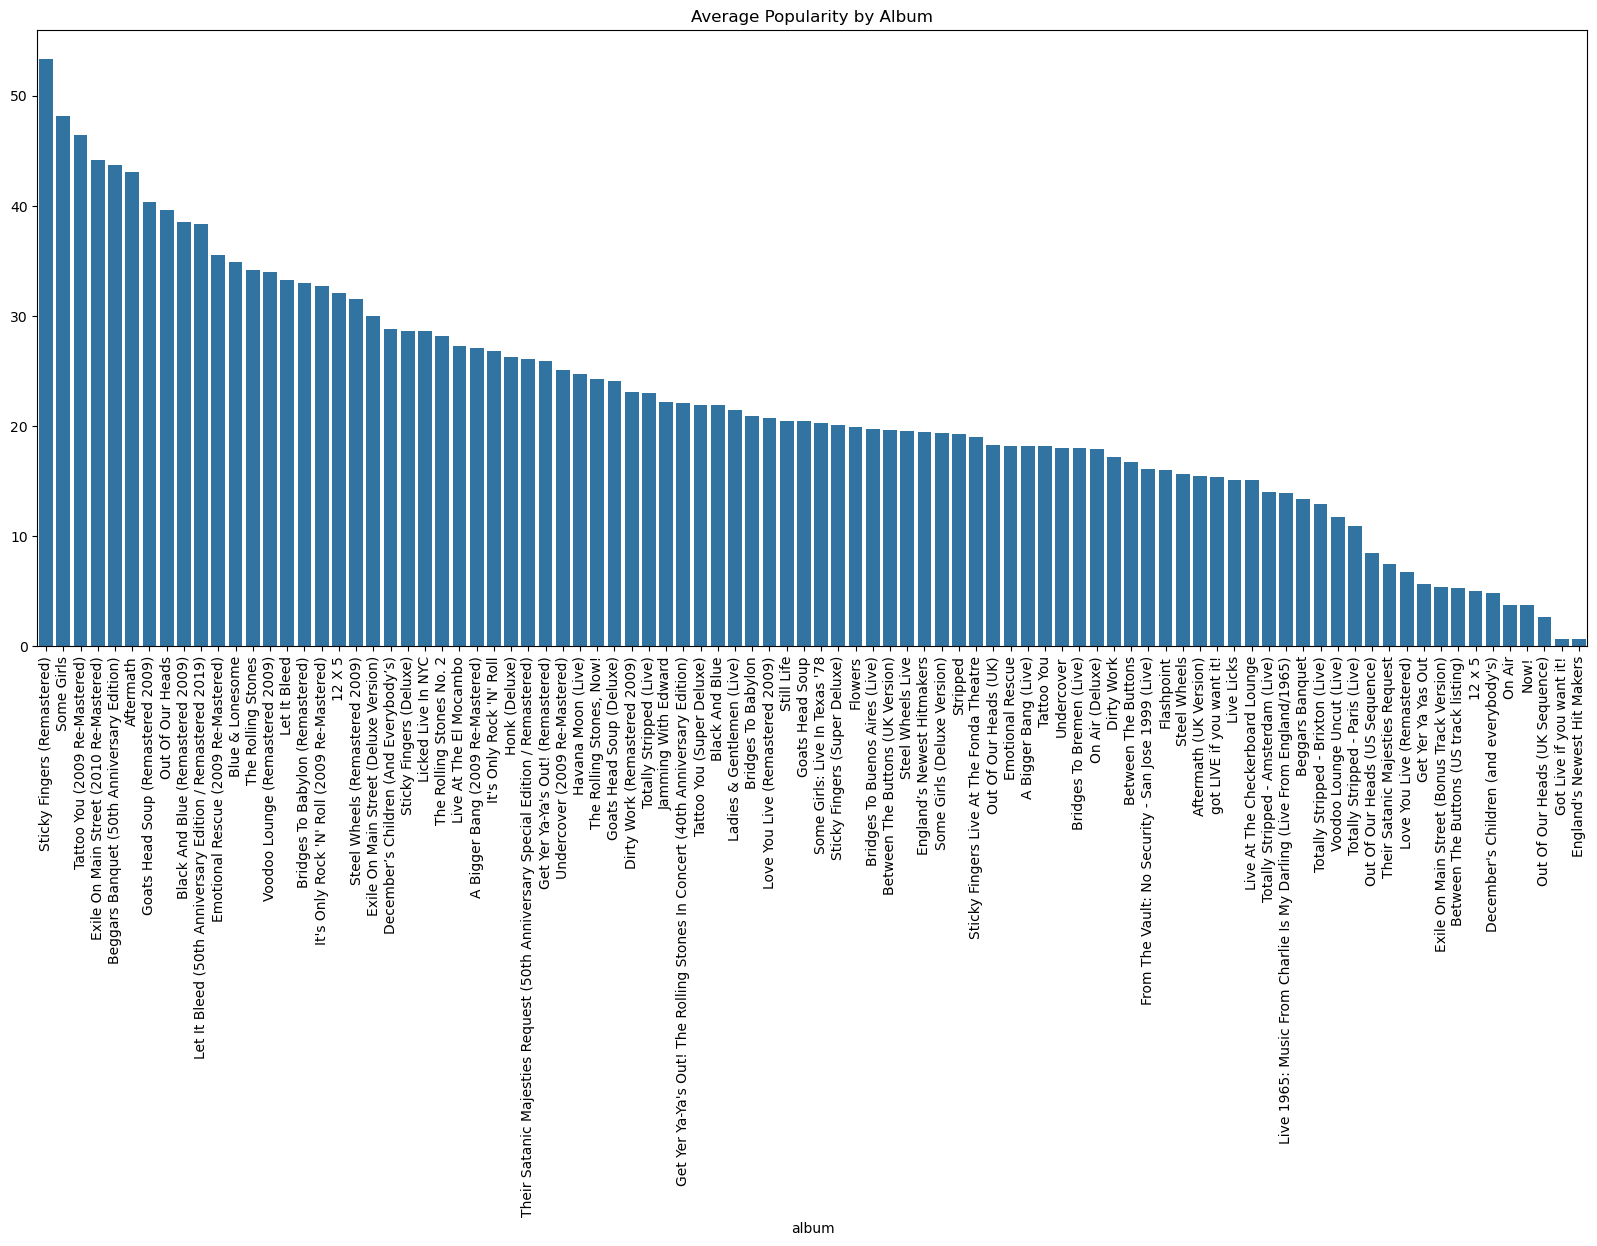

In [49]:
# Album-wise average popularity
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

# Plotting album-wise popularity
plt.figure(figsize=(20,8))
sns.barplot(x=album_popularity.index, y=album_popularity.values)
plt.xticks(rotation=90)
plt.title('Average Popularity by Album')
plt.show()


## Song Duration Distribution
Analyzing the distribution of song durations might reveal interesting insights about how long Rolling Stones' songs typically are.

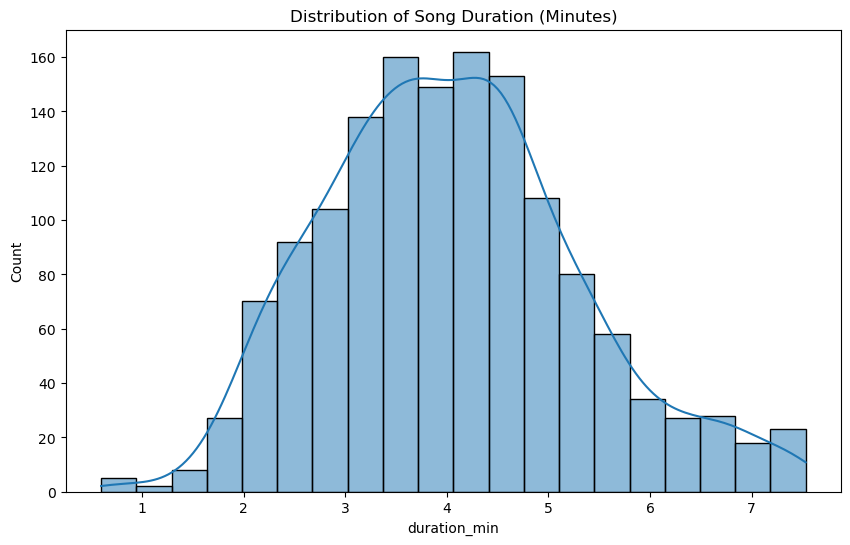

In [51]:
# Distribution of song duration in minutes
df1['duration_min'] = df1['duration_ms'] / 60000

plt.figure(figsize=(10,6))
sns.histplot(df1['duration_min'], bins=20, kde=True)
plt.title('Distribution of Song Duration (Minutes)')
plt.show()


## Instrumentalness vs Popularity
Explore how instrumentalness relates to popularity, since instrumental tracks are often very different from vocal ones.


- Instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

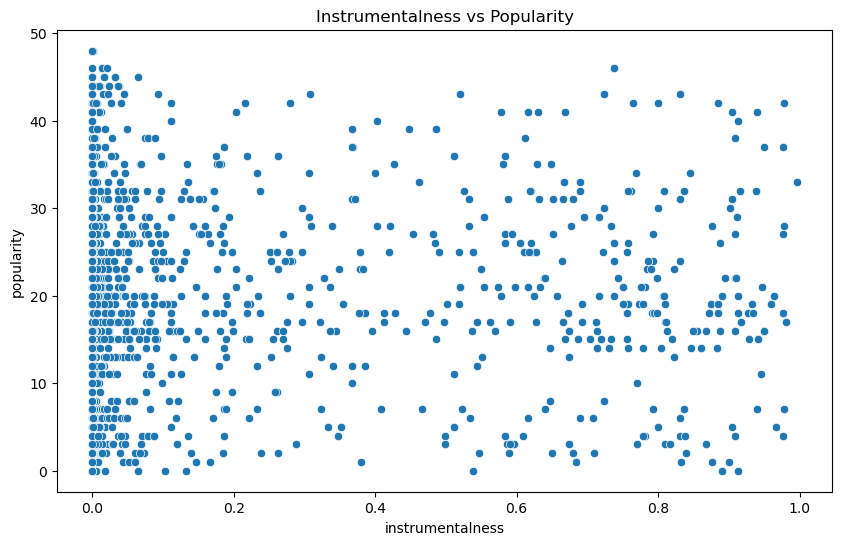

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='instrumentalness', y='popularity', data=df1)
plt.title('Instrumentalness vs Popularity')
plt.show()

- <font color = red> The songs which have below ```0.2``` instrumentalness are more popular that the songs that have them, as from the above plot we can see that the data is more concentrated on the left side of the graph

## Tempo Distribution
Explore the tempo distribution of songs to understand the range and typical tempos of Rolling Stones songs.

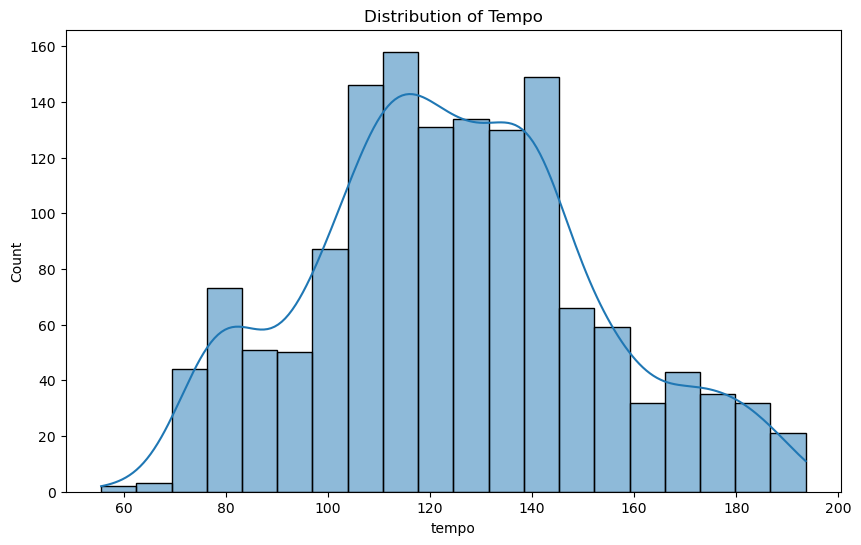

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(df1['tempo'], bins=20, kde=True)
plt.title('Distribution of Tempo')
plt.show()

## Loudness vs Energy
Loudness and energy are often related. This plot will show how energy varies with loudness.

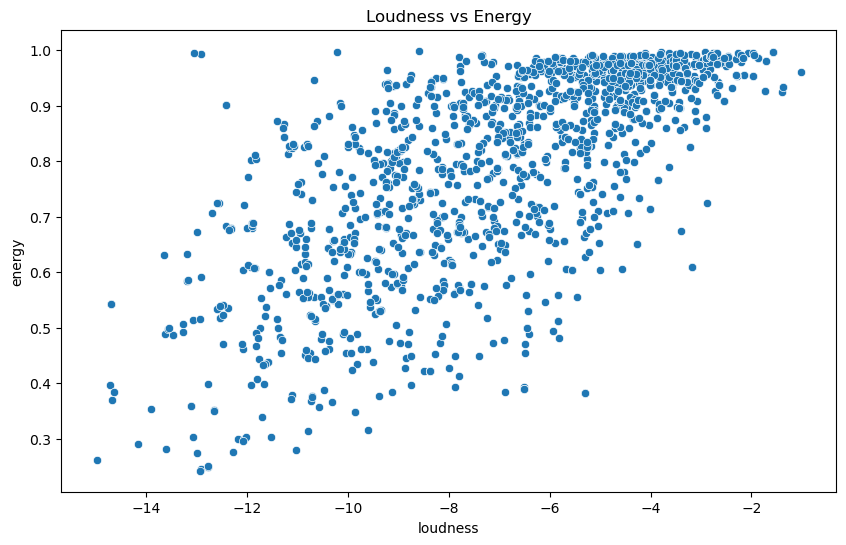

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='loudness', y='energy', data=df1)
plt.title('Loudness vs Energy')
plt.show()

## Valence (Positivity) Distribution
Valence indicates the positivity of a song. Visualizing the distribution of this feature can give insights into the mood of the Rolling Stones' music.

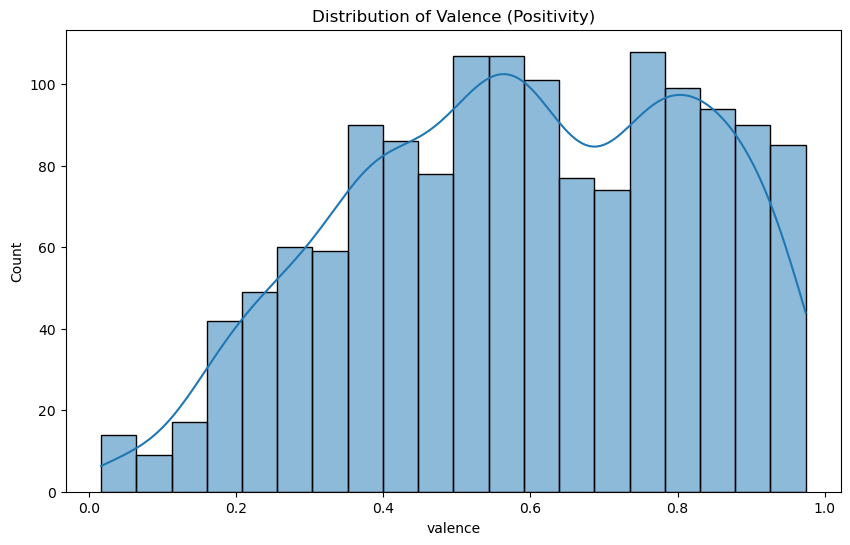

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(df1['valence'], bins=20, kde=True)
plt.title('Distribution of Valence (Positivity)')
plt.show()

## Heatmap for Missing Values
A heatmap can help you visualize the presence of any missing values across the dataset.

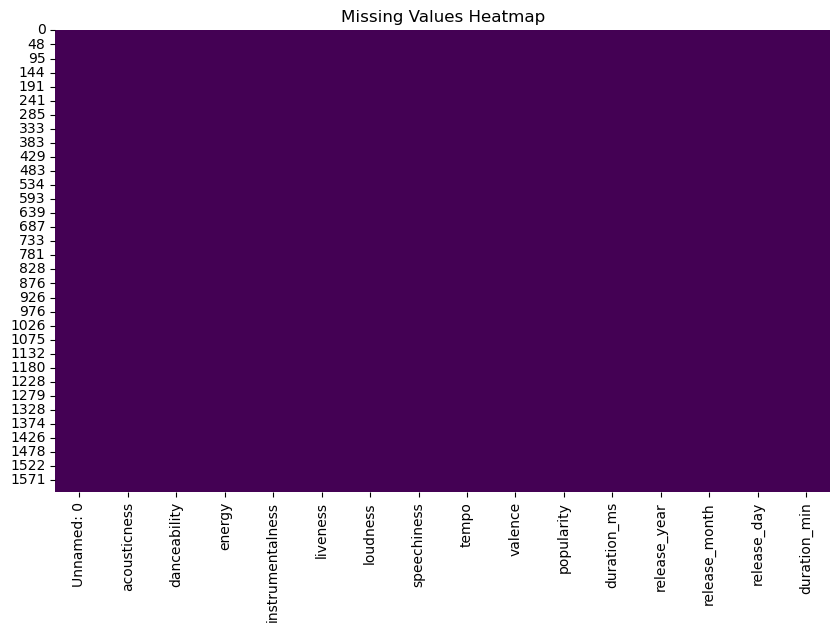

In [57]:
# Heatmap for missing values
plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Popularity Over Time (Release Year)
Analyze how the popularity of songs has changed over the years.

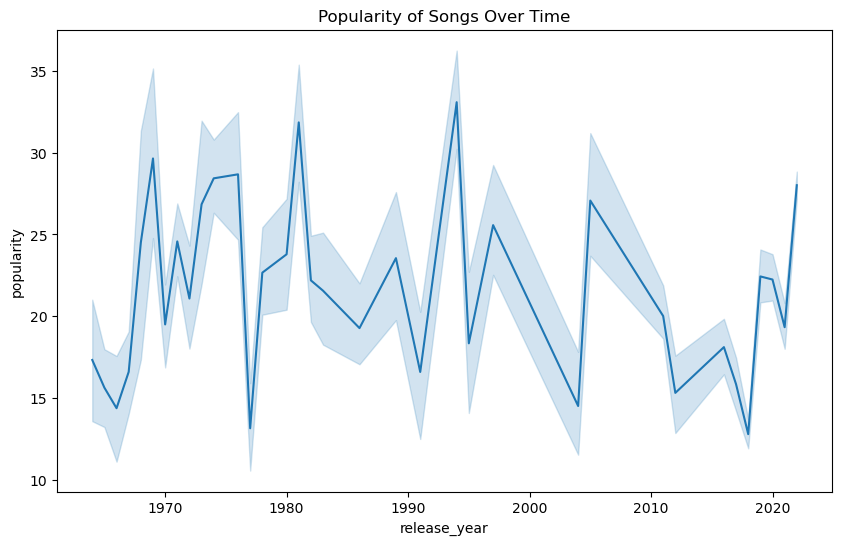

In [60]:
# Popularity over time
plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='popularity', data=df1)
plt.title('Popularity of Songs Over Time')
plt.show()

## Song Count by Album
This will show how many songs each album has in the dataset.

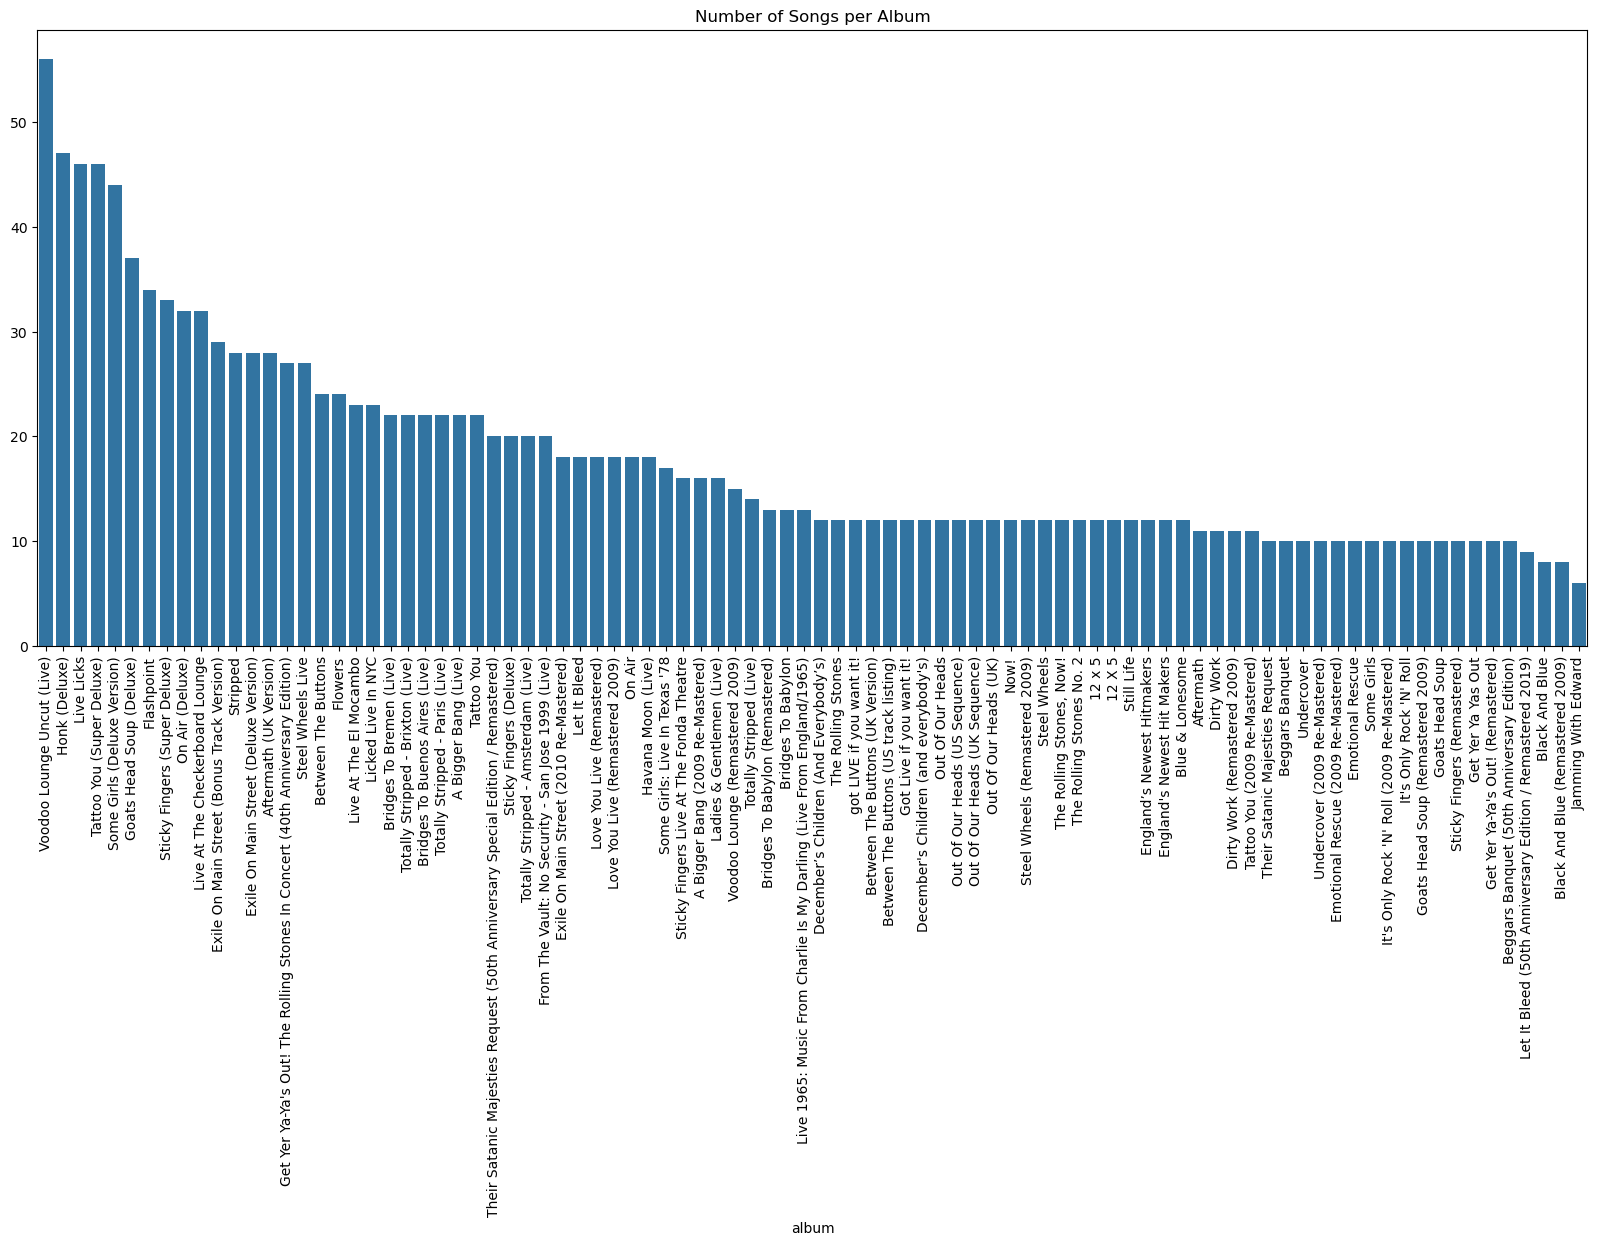

In [62]:
# Count the number of songs per album
album_counts = df['album'].value_counts()

# Plot the number of songs per album
plt.figure(figsize=(20,8))
sns.barplot(x=album_counts.index, y=album_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Songs per Album')
plt.show()


## Feature Scaling
For clustering analysis, it's important to scale features like popularity, loudness, danceability, and others, as they may have different ranges. You can use StandardScaler or MinMaxScaler to standardize your features.

In [63]:
from sklearn.preprocessing import StandardScaler

# Select the features for scaling
features_to_scale = ['danceability', 'energy', 'acousticness', 'loudness', 'popularity', 'tempo', 'valence', 'duration_ms']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the selected features
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])


## Feature Selection
Based on your findings, you can select relevant features for further analysis. For example, for clustering, you may want to focus on features like danceability, energy, acousticness, loudness, tempo, and popularity.

In [66]:
# Select relevant features for clustering or further analysis
selected_features = df1[['danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence', 'popularity']]
selected_features

danceability    energy  acousticness  loudness     tempo   valence  \
0        -0.081277  1.119371     -0.721761 -2.140618 -0.235269 -2.423811   
1        -1.061677  0.961660      0.851245  0.747380  0.251665 -1.176380   
2        -0.632305  0.984190      0.758089  0.700018  0.201394 -1.198052   
3        -0.753960  1.074310      1.427925  0.486713  0.307366 -1.917557   
4        -1.226270  0.984190      0.687113  0.642330  0.218296 -1.661829   
...            ...       ...           ...       ...       ...       ...   
1605     -0.059808  0.775787     -0.390835 -0.823392  1.912359  1.636623   
1606      0.247909 -0.497161     -0.831773 -0.899242 -0.089992 -0.621581   
1607      2.258802 -0.114150      0.558469 -0.377194 -0.994081  1.064487   
1608      1.614744 -1.398363     -0.124675 -0.949096 -0.791439 -0.248826   
1609      1.807961  0.787052      0.611701 -0.523909  0.027996  1.645292   

      popularity  
0       1.240090  
1       1.333826  
2       1.333826  
3       1.146354  
4       1.146354  
...          ...  
1605    1.802506  
1606    1.521298  
1607    0.958882  
1608    0.677674  
1609    1.427562  

[1446 rows x 7 columns]

In [69]:
# Before moving forward with clustering or other analysis, ensure the dataset is now clean and well-structured.
# Final dataset inspection
print(df1.info())

# Check the final shape of the dataset
print(f"Final dataset shape: {df1.shape}")

# Display the first few rows of the refined dataset
print(df1.head(5))


<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1446 non-null   int64  
 1   acousticness      1446 non-null   float64
 2   danceability      1446 non-null   float64
 3   energy            1446 non-null   float64
 4   instrumentalness  1446 non-null   float64
 5   liveness          1446 non-null   float64
 6   loudness          1446 non-null   float64
 7   speechiness       1446 non-null   float64
 8   tempo             1446 non-null   float64
 9   valence           1446 non-null   float64
 10  popularity        1446 non-null   float64
 11  duration_ms       1446 non-null   float64
 12  release_year      1446 non-null   int32  
 13  release_month     1446 non-null   int32  
 14  release_day       1446 non-null   int32  
 15  duration_min      1446 non-null   float64
dtypes: float64(12), int32(3), int64(1)
memory usage

<font size = 8 color = green>Feature Engineering

---
Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album
First, we need to identify the two albums with the highest number of popular songs. We'll define "popular" songs based on a threshold, say popularity >= 80.

---

/var/folders/kv/snqlp26n5k703gsbhzj4h3680000gn/T/ipykernel_1498/1020160568.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='album', y='count', data=top_albums, palette='viridis')


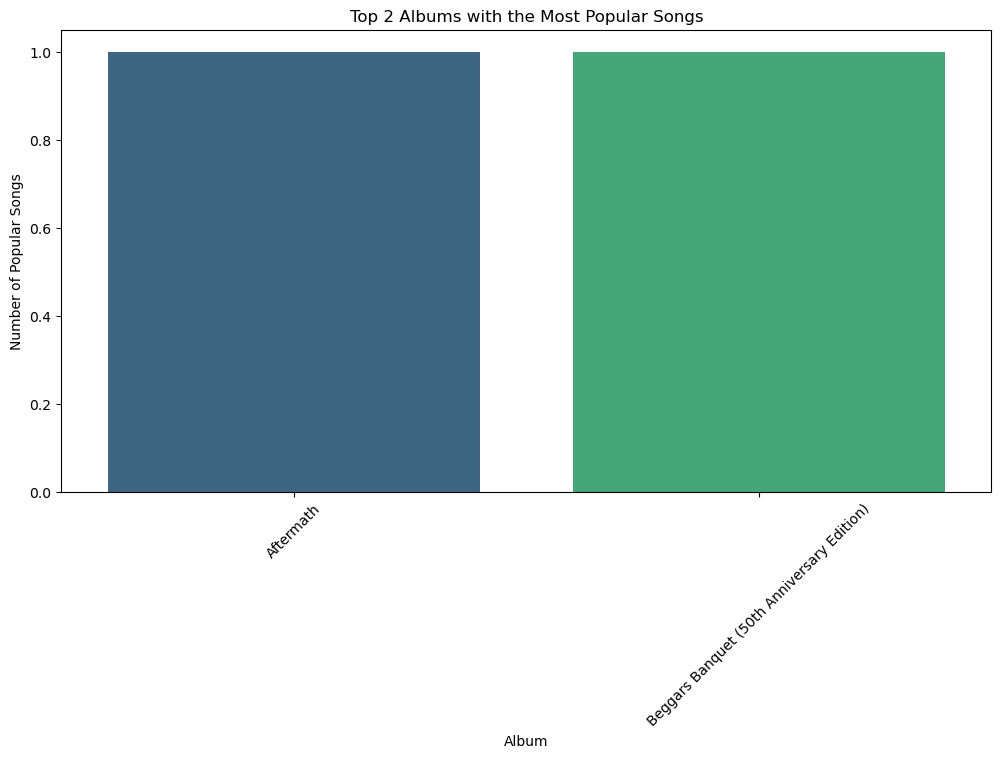

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a popularity threshold (e.g., 70)
popularity_threshold = 70

# Filter the dataset to include only popular songs
popular_songs = df[df['popularity'] >= popularity_threshold]

# Count the number of popular songs per album
popular_albums = popular_songs.groupby('album').size().reset_index(name='count')

# Sort the albums by the number of popular songs
top_albums = popular_albums.sort_values(by='count', ascending=False).head(2)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='album', y='count', data=top_albums, palette='viridis')
plt.title('Top 2 Albums with the Most Popular Songs')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45)
plt.show()


## Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

Next, we will examine the distribution of key features like danceability, energy, acousticness, loudness, and tempo. This will help us identify patterns or relationships between these features.

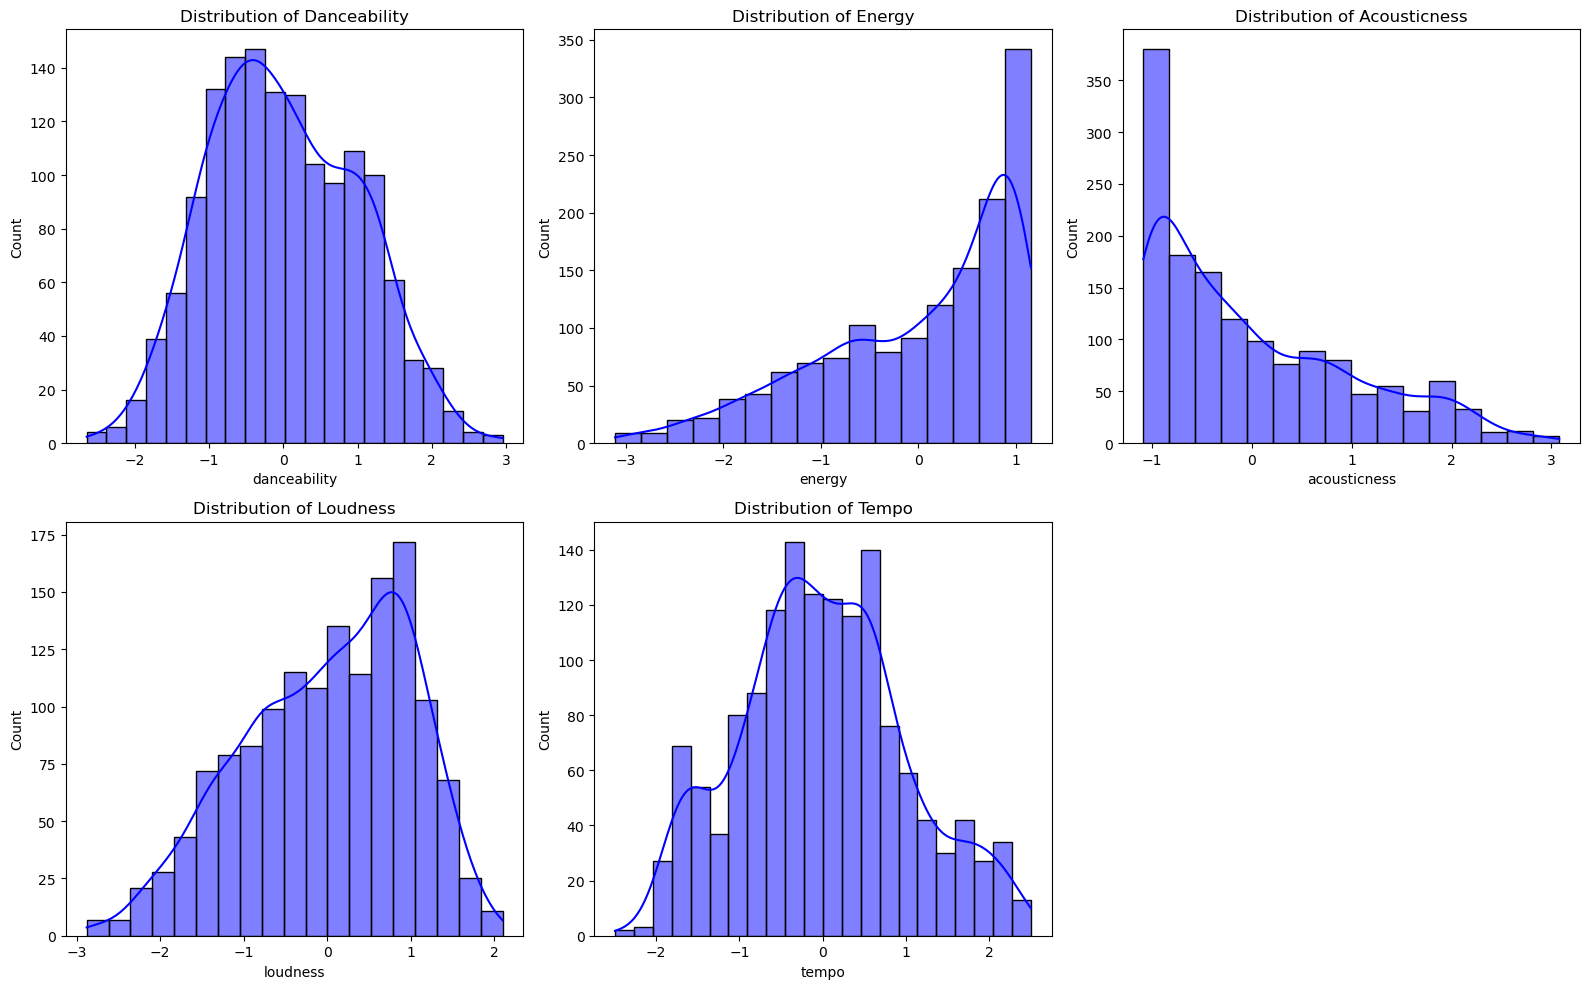

In [82]:
# Visualizing the distribution of key features
features = ['danceability', 'energy', 'acousticness', 'loudness', 'tempo']

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Create a subplot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df1[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()


## Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved
To explore how popularity correlates with other features, we'll use a pair plot to visualize the relationships between popularity and key features like danceability, energy, loudness, and tempo. We can also calculate the correlation matrix.

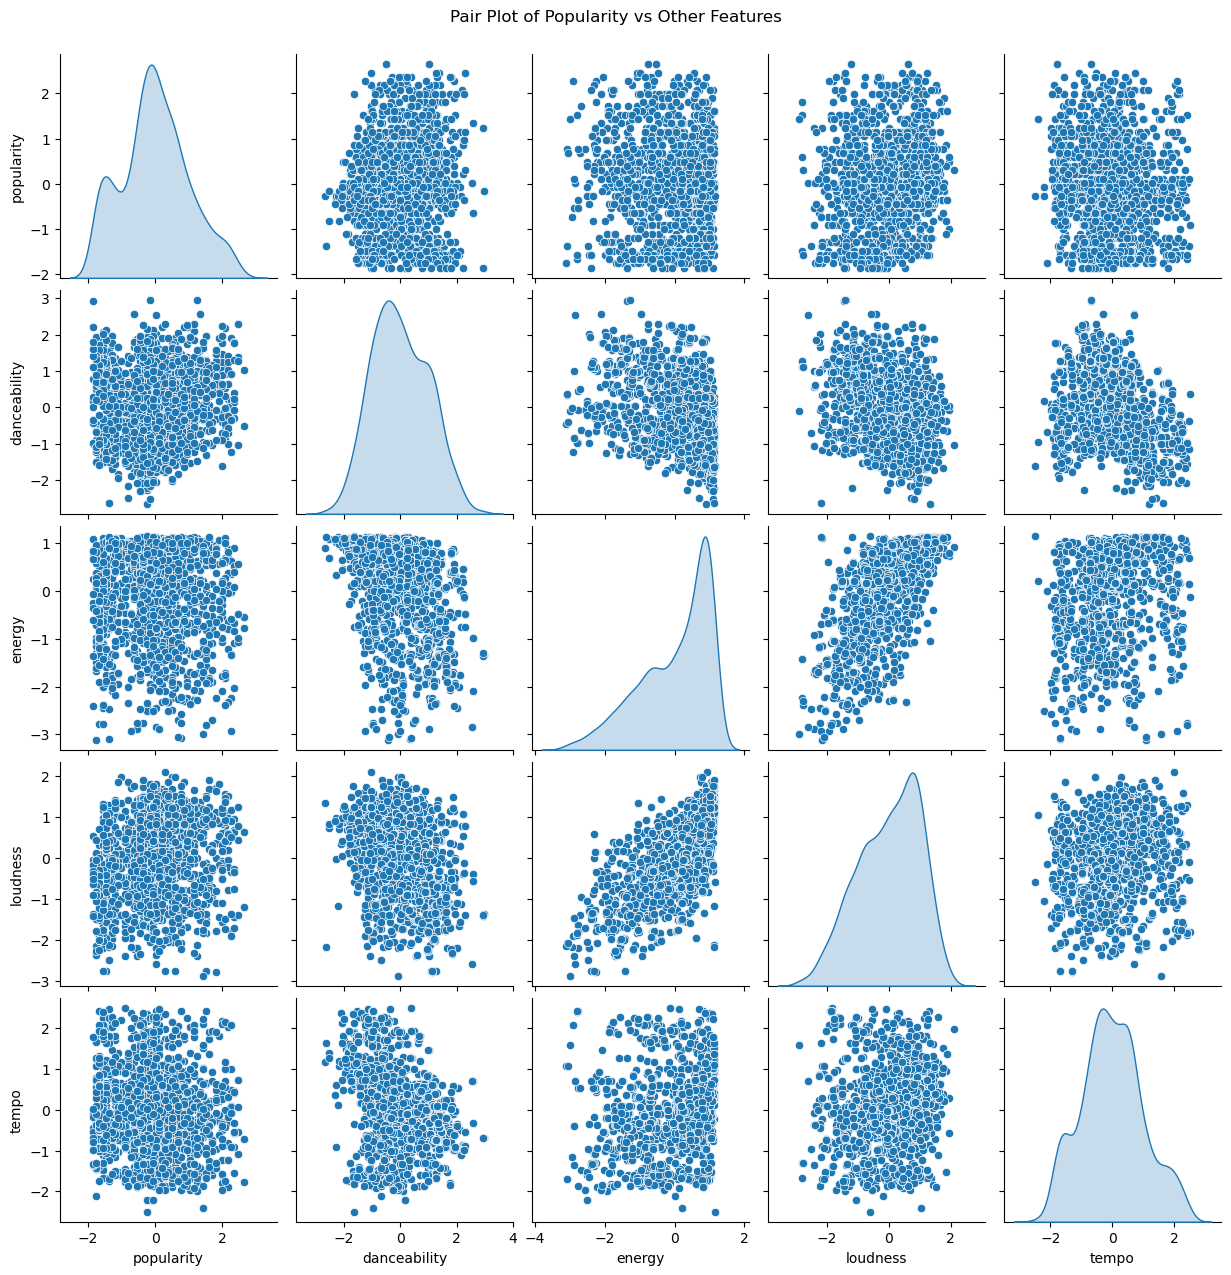

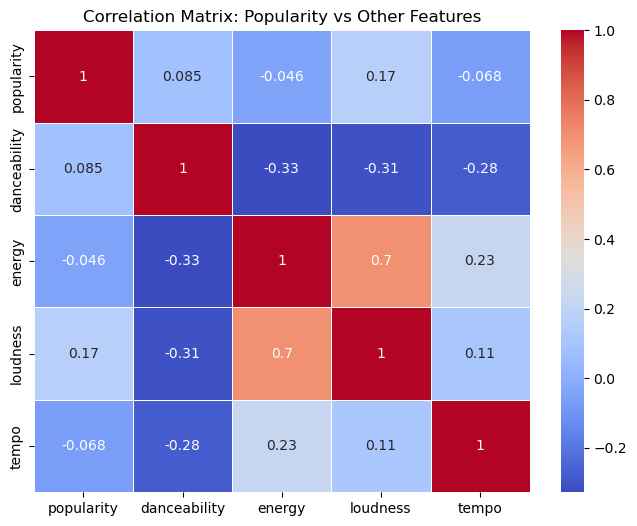

In [83]:
# Pair plot to visualize relationships between popularity and other features
sns.pairplot(df1[['popularity', 'danceability', 'energy', 'loudness', 'tempo']], diag_kind='kde')
plt.suptitle("Pair Plot of Popularity vs Other Features", y=1.02)
plt.show()

# Correlation matrix between popularity and selected features
correlation_matrix = df1[['popularity', 'danceability', 'energy', 'loudness', 'tempo']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Popularity vs Other Features')
plt.show()


<font size = 6 color = green> <b>Insights on the significance of dimensionality reduction techniques

Dimensionality reduction techniques like PCA (Principal Component Analysis) are useful for reducing the number of features in a dataset while retaining most of the important information. This is especially beneficial when working with high-dimensional data, where too many features can lead to overfitting or inefficiency in computation.

Insights:

- When to use PCA: PCA is helpful when we have multicollinearity (highly correlated features) and need to reduce the dimensionality of the dataset. It helps in visualizing the dataset in a lower-dimensional space.
Benefits of PCA: By using PCA, we can:
- Improve model performance by reducing overfitting.
- Visualize the data in a simpler form.
- Reduce the computational cost of modeling.

Code for PCA:

We'll perform PCA on the selected features and visualize the explained variance ratio to see how much information is captured by the principal components.

/var/folders/kv/snqlp26n5k703gsbhzj4h3680000gn/T/ipykernel_1498/2142552749.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[1, 2], y=explained_variance, palette='viridis')


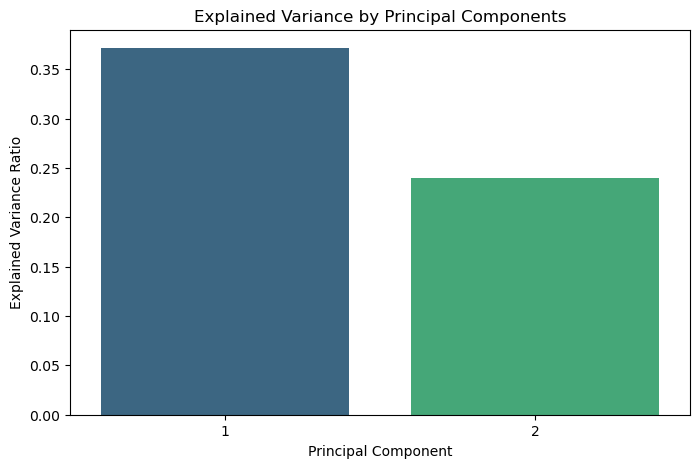

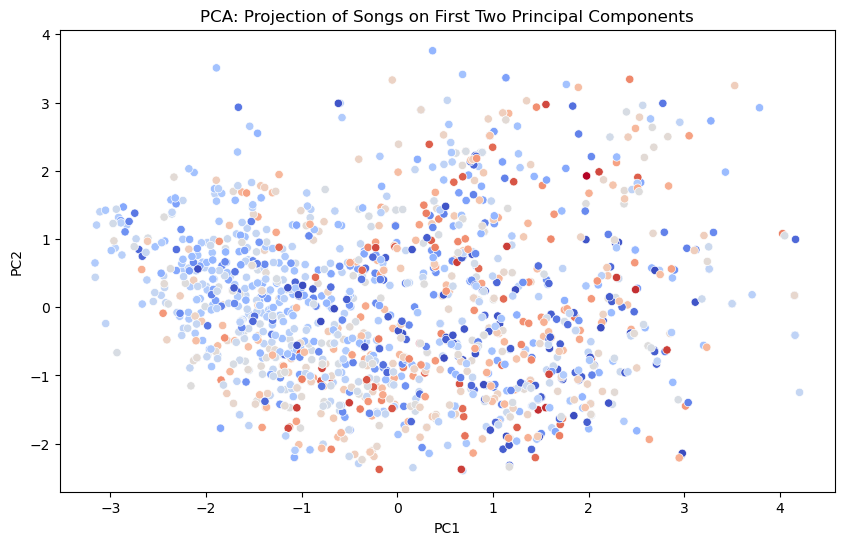

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence']])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
sns.barplot(x=[1, 2], y=explained_variance, palette='viridis')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Add principal components to the dataset for further analysis
df1['PC1'] = principal_components[:, 0]
df1['PC2'] = principal_components[:, 1]

# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='popularity', data=df1, palette='coolwarm', legend=None)
plt.title('PCA: Projection of Songs on First Two Principal Components')
plt.show()


## Identify the right number of clusters (Elbow Method & Silhouette Score)
First, we'll apply the Elbow Method to find the optimal number of clusters.

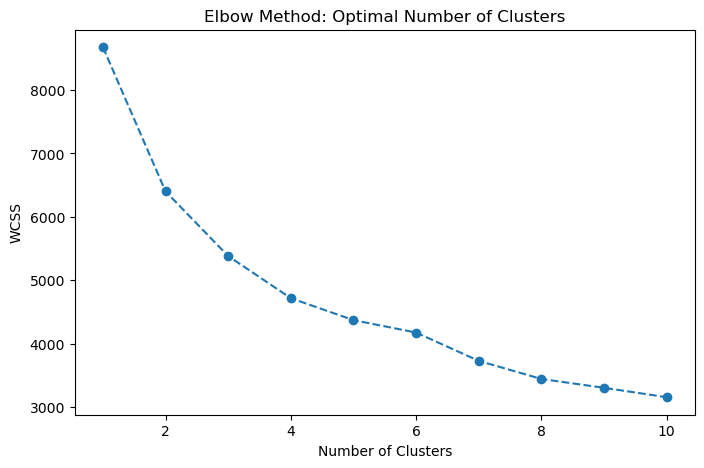

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features to be used for clustering
features = ['danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Apply the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


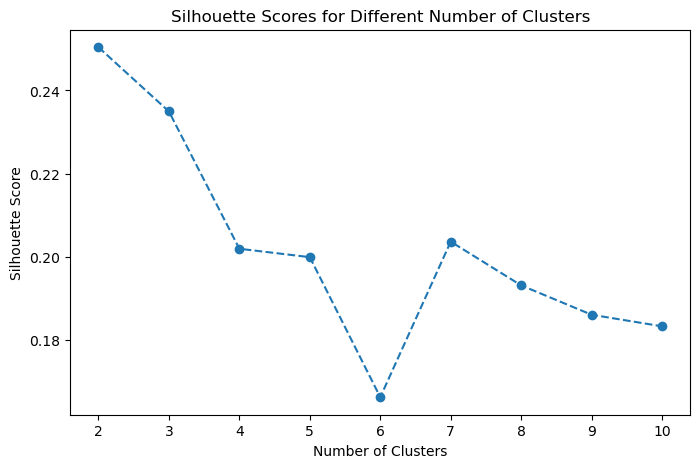

In [86]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette score for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


## Use appropriate clustering algorithms
We'll use the K-Means algorithm based on the number of clusters identified from the Elbow Method and Silhouette Score.

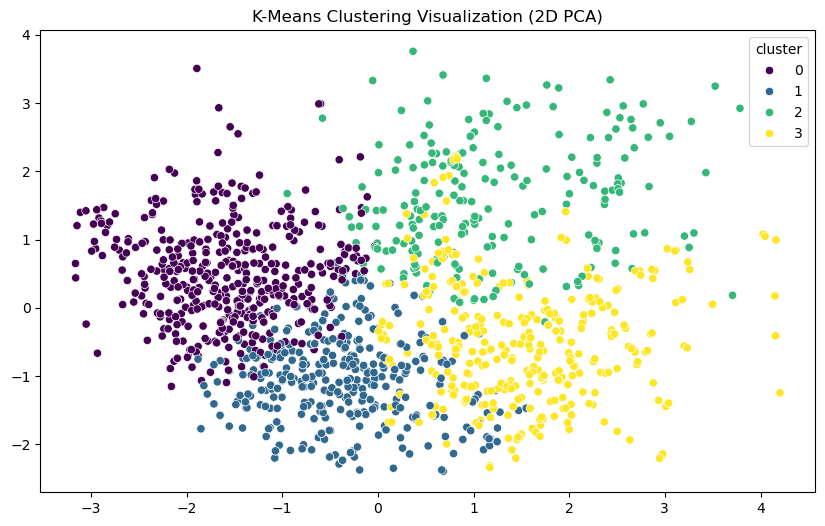

In [137]:
# Based on the Elbow and Silhouette results, let's assume the optimal number of clusters is 4 (as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
df1['cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster centers for later analysis
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters in 2D using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df1['cluster'], palette='viridis', legend='full')
plt.title('K-Means Clustering Visualization (2D PCA)')
plt.show()


## Define each cluster based on the features
After performing clustering, we need to interpret the cluster centers and understand the characteristics of each cluster.

   danceability    energy  acousticness  loudness     tempo   valence
0     -0.941763  0.706406     -0.402308  0.537719  0.599148 -0.684402
1      0.432689  0.561204     -0.253406  0.674027 -0.134286  0.702207
2     -0.181376 -0.999673      1.345258 -0.446498 -0.783795 -0.755299
3      0.860734 -0.837944     -0.132921 -1.128115 -0.081005  0.628736
   cluster  danceability    energy  acousticness  loudness     tempo   valence
0        0     -0.941763  0.706406     -0.402308  0.537719  0.599148 -0.684402
1        1      0.432689  0.561204     -0.253406  0.674027 -0.134286  0.702207
2        2     -0.181376 -0.999673      1.345258 -0.446498 -0.783795 -0.755299
3        3      0.860734 -0.837944     -0.132921 -1.128115 -0.081005  0.628736


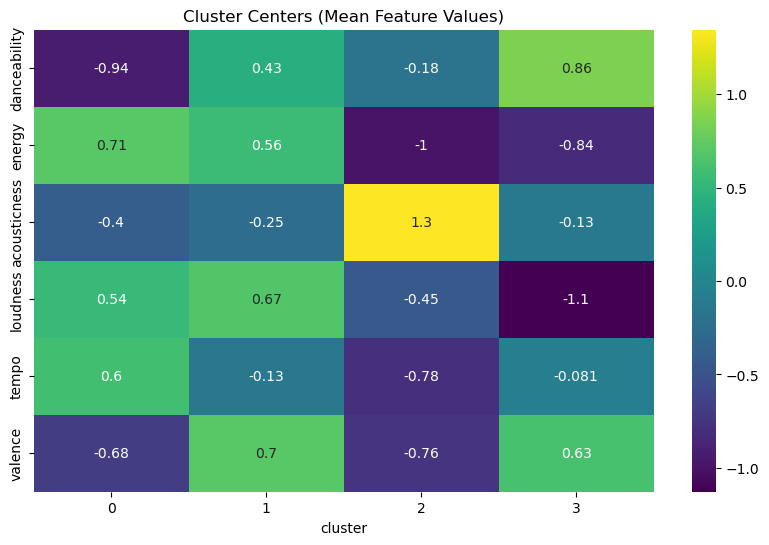

In [88]:
# Create a DataFrame to analyze the cluster centers
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=features)

# Print the cluster centers to see the feature values that define each cluster
print(cluster_centers_df)

# Analyze the mean feature values of each cluster
cluster_means = df1.groupby('cluster')[features].mean().reset_index()
print(cluster_means)

# Visualization of cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.set_index('cluster').T, cmap='viridis', annot=True)
plt.title('Cluster Centers (Mean Feature Values)')
plt.show()


In [96]:
from sklearn.preprocessing import StandardScaler

# Features to be used for clustering
features = ['danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])


In [100]:
print(len(df1))
print(len(scaled_data)) 

1446
1610


# DBSCAN Clustering

(Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that is well-suited for datasets with noise and clusters of varying shapes and sizes. It identifies clusters based on the density of data points in a region.

Steps to Implement DBSCAN Clustering:
- Standardize the Data: Similar to K-Means, we should standardize the features for better performance.
- Apply DBSCAN: Use the DBSCAN algorithm to find clusters in the data.
- Visualize the Clusters: Use a scatter plot to visualize the clusters formed by DBSCAN.

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame

# Features to be used for clustering
features = ['danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[features])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df1['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Now check the assignment
print(df1['dbscan_cluster'].shape)  # Should match the number of rows in df
print(len(df1))  # Make sure this matches


(1446,)
1446


## Standardize the Data

We'll standardize the same features we used for K-Means.

In [118]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df1['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Count the number of clusters and noise points (-1 indicates noise)
num_clusters = len(set(df1['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'] else 0)
num_noise = list(df1['dbscan_cluster']).count(-1)

print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise}')


Number of clusters: 22
Number of noise points: 1278


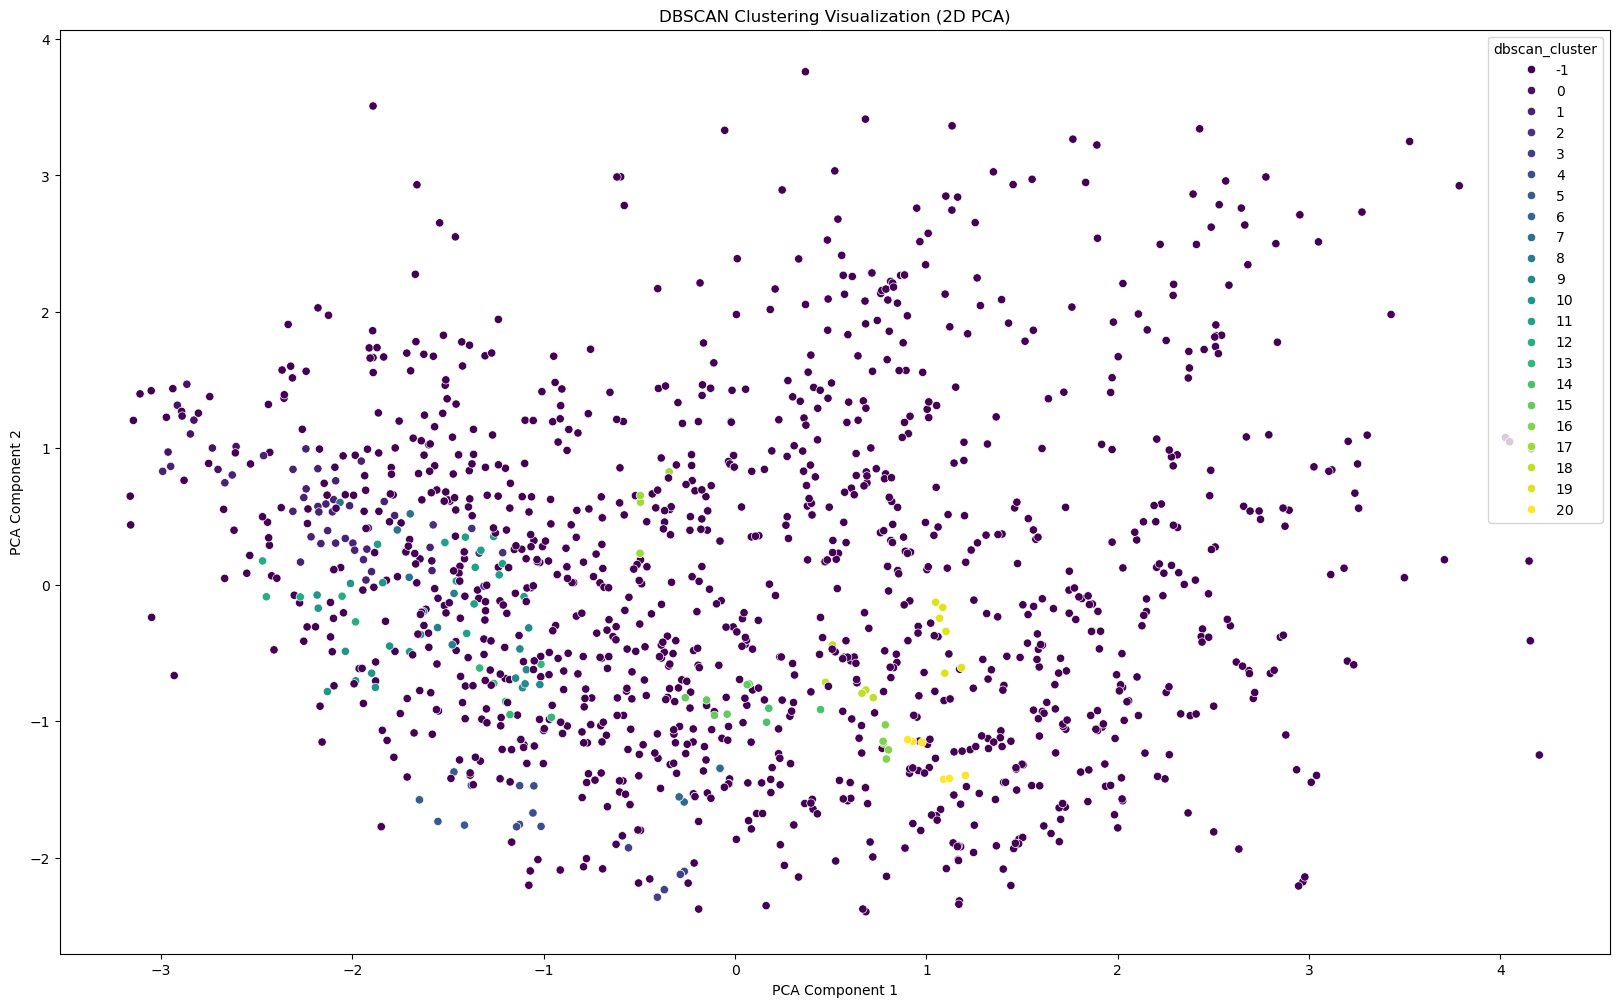

In [119]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(20, 12))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df1['dbscan_cluster'], palette='viridis', legend='full')
plt.title('DBSCAN Clustering Visualization (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


<font size = 6 color = blue> Filtering out noise clusters

In [120]:
# Filter out noise points (where dbscan_cluster == -1)
filtered_df = df1[df1['dbscan_cluster'] != -1].reset_index(drop=True)

# Check the number of remaining points
print(f'Original number of points: {len(df1)}')
print(f'Number of points after noise reduction: {len(filtered_df)}')


Original number of points: 1446
Number of points after noise reduction: 168


Unique clusters after noise reduction: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


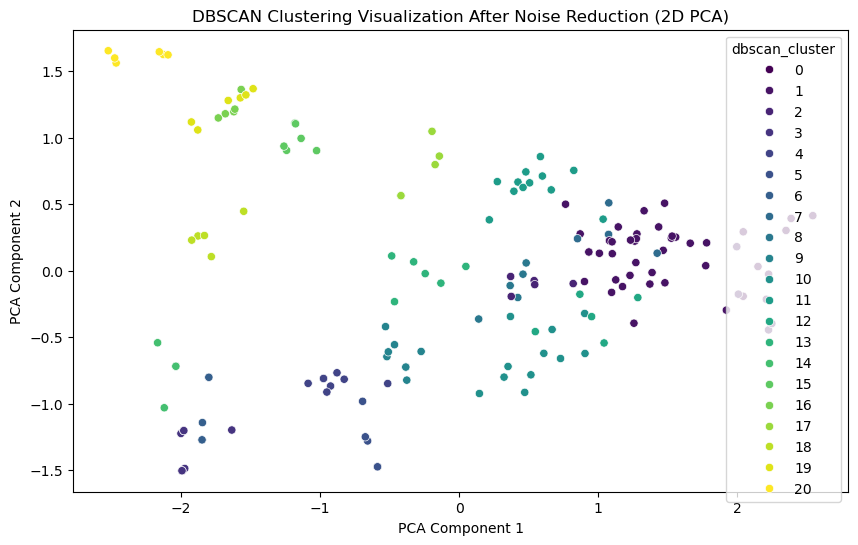

In [135]:
# Check the unique clusters in the filtered DataFrame
unique_clusters = set(filtered_df['dbscan_cluster'])
print(f'Unique clusters after noise reduction: {unique_clusters}')

# Visualize the remaining clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data[df1['dbscan_cluster'] != -1])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=filtered_df['dbscan_cluster'], palette='viridis', legend='full')
plt.title('DBSCAN Clustering Visualization After Noise Reduction (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


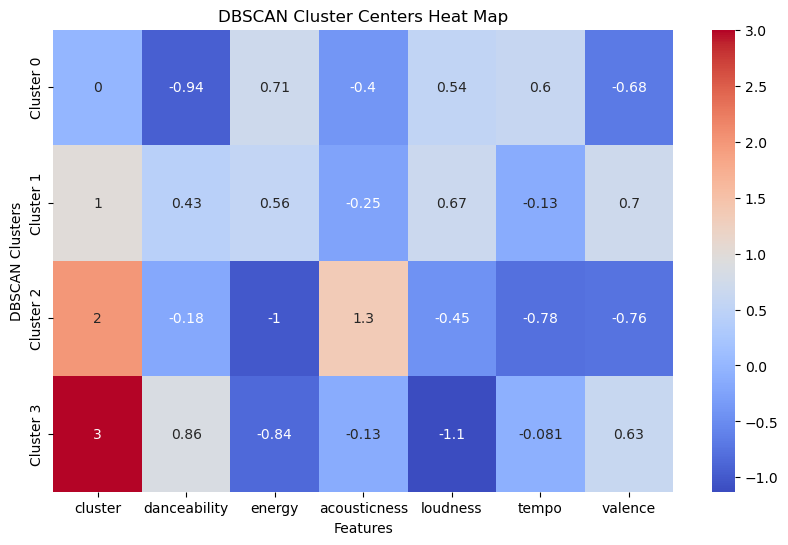

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', xticklabels=cluster_means.columns, yticklabels=[f'Cluster {i}' for i in cluster_means.index])
plt.title('DBSCAN Cluster Centers Heat Map')
plt.xlabel('Features')
plt.ylabel('DBSCAN Clusters')
plt.show()


## Making recommendations based on K-Means Clustering

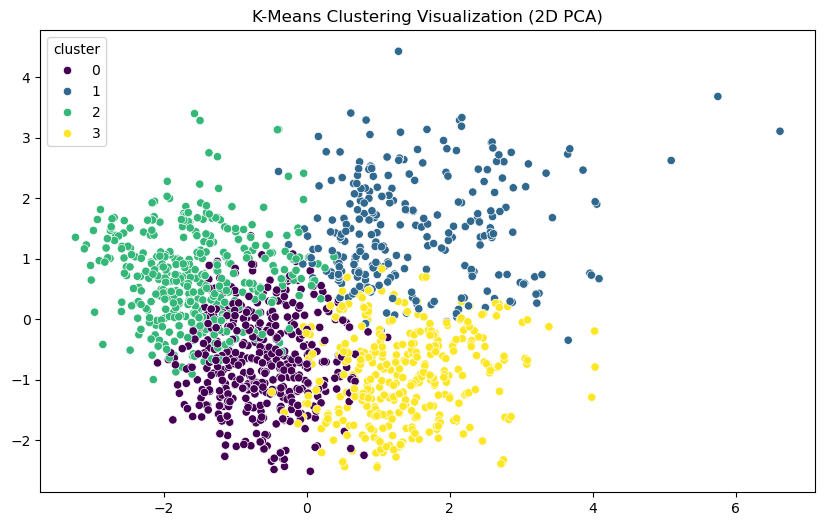


Recommendations for Cluster 0:
                                       name  \
862           Start Me Up - Remastered 2009   
901       Beast Of Burden - Remastered 1994   
1120            Brown Sugar - 2009 Remaster   
1123  Can't You Hear Me Knocking - 2009 Mix   
1043                          Tumbling Dice   

                                        album  popularity  cluster  
862             Tattoo You (2009 Re-Mastered)          76        0  
901                                Some Girls          72        0  
1120              Sticky Fingers (Remastered)          66        0  
1123              Sticky Fingers (Remastered)          63        0  
1043  Exile On Main Street (2010 Re-Mastered)          63        0  

Recommendations for Cluster 1:
                                    name                              album  \
1248                       Gimme Shelter                       Let It Bleed   
1023                               Angie  Goats Head Soup (Remastered 2009)   
11

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming df is your DataFrame and features are defined
features = ['danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence']

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['cluster'], palette='viridis', legend='full')
plt.title('K-Means Clustering Visualization (2D PCA)')
plt.show()

# Function to recommend songs based on cluster
def recommend_songs_kmeans(df, cluster_number, top_n=5):
    """ Recommend songs from the specified K-Means cluster. """
    recommendations = df[df['cluster'] == cluster_number]
    # Sort by popularity and select top_n songs
    top_recommendations = recommendations.sort_values(by='popularity', ascending=False).head(top_n)
    return top_recommendations[['name', 'album', 'popularity', 'cluster']]

# Generate recommendations for each K-Means cluster
for cluster_num in range(4):  # Assuming cluster numbers are 0 to 3
    print(f"\nRecommendations for Cluster {cluster_num}:")
    recommendations = recommend_songs_kmeans(df, cluster_num)
    print(recommendations)


---
<font color = red>

# Results:

## Based on our code above we can make the below inferences from our dataset:
- Recommendation based on the k-means clustering will produce ```n``` number of clusters as poer our input and they will suggest the songs from spotify acc to the user's preferences.
- DBSCAN clustering presents more valuable insights as compared to the K-means due to considerable amount of noise reduction.
- Heatmap from our K-means cluster shows insights based on each cluster on 4 parameters, 'danceability', 'energy', 'acousticness', 'loudness', 'tempo', 'valence', where we can decipher each cluster's characterisitcs on these features
  example: Cluster 0 has high energy , loudness and tempo, however this has a -0.94 danceability which can mean that this clustere might entail fast paced songs, which are enjoyable but not danceable, like Raps or EDM music.
- Heatmap from our DBSCAN cluster displays almost the same results as our K-means
- Entialing to the clusters generated our recommendation engine has made valid recommendations pertaining to each cluster characteristics